In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import seaborn as sns
from datasets import load_dataset
#hello


# Loading Dataset

data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()

#Data Clean Up
df.job_posted_date = pd.to_datetime(df.job_posted_date)

#convert job_skills to list
df['job_skills'] = df['job_skills'].apply(lambda skill_li: ast.literal_eval(skill_li) if pd.notna(skill_li) else skill_li)


In [100]:
df_da_us = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Scientist')].copy() #Filter country and job
df_da_us.head(2)


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None


In [101]:
df_da_us['Job_posted_month_no'] = df_da_us['job_posted_date'].dt.month # to create a new column with number of month
df_da_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,Job_posted_month_no
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['...",4
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None,3
239,Data Scientist,Power BI Data Analytics & Data Scientist,"Maharashtra, India",via Shine,Full-time,False,India,2023-11-11 13:10:08,False,False,India,None,NaN,NaN,Emerson,[power bi],{'analyst_tools': ['power bi']},11
323,Data Scientist,Forecasting Analyst,Anywhere,via LinkedIn,Full-time,True,India,2023-09-28 13:48:45,False,False,India,None,NaN,NaN,Straive,[excel],{'analyst_tools': ['excel']},9
389,Data Scientist,Data Scientist,"New Delhi, Delhi, India",via LinkedIn,Contractor,False,India,2023-09-12 13:16:27,False,False,India,None,NaN,NaN,Digital India Corporation,"[sql, sas, sas, excel, powerpoint, tableau]","{'analyst_tools': ['sas', 'excel', 'powerpoint...",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785591,Data Scientist,Data Scientist T8,"Bengaluru, Karnataka, India",via BeBee India,Full-time,False,India,2023-01-01 06:29:03,False,False,India,None,NaN,NaN,Mercedes-Benz Research and Development India P...,"[java, python, aws, azure, kubernetes, docker,...","{'async': ['jira', 'confluence'], 'cloud': ['a...",1
785645,Data Scientist,Data Science Intern,Anywhere,via LinkedIn,Internship,True,India,2023-01-20 06:51:23,False,False,India,None,NaN,NaN,TwiLearn EduTech Pvt. Ltd.,"[python, tableau]","{'analyst_tools': ['tableau'], 'programming': ...",1
785654,Data Scientist,Data Science Intern,Anywhere,via LinkedIn,None,True,India,2023-01-31 06:11:46,False,False,India,None,NaN,NaN,Corizo,[zoom],{'sync': ['zoom']},1
785674,Data Scientist,Data Scientist,"Kolkata, West Bengal, India",via LinkedIn,Full-time,False,India,2023-01-12 06:12:32,False,False,India,None,NaN,NaN,One Billion Ideas Pvt. LTD.,"[r, python, sql, scala, java, c++, matplotlib,...","{'analyst_tools': ['tableau'], 'libraries': ['...",1


In [102]:
df_da_us_explode =df_da_us.explode('job_skills') # Exploded skills 
df_da_us


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,Job_posted_month_no
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['...",4
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None,3
239,Data Scientist,Power BI Data Analytics & Data Scientist,"Maharashtra, India",via Shine,Full-time,False,India,2023-11-11 13:10:08,False,False,India,None,NaN,NaN,Emerson,[power bi],{'analyst_tools': ['power bi']},11
323,Data Scientist,Forecasting Analyst,Anywhere,via LinkedIn,Full-time,True,India,2023-09-28 13:48:45,False,False,India,None,NaN,NaN,Straive,[excel],{'analyst_tools': ['excel']},9
389,Data Scientist,Data Scientist,"New Delhi, Delhi, India",via LinkedIn,Contractor,False,India,2023-09-12 13:16:27,False,False,India,None,NaN,NaN,Digital India Corporation,"[sql, sas, sas, excel, powerpoint, tableau]","{'analyst_tools': ['sas', 'excel', 'powerpoint...",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785591,Data Scientist,Data Scientist T8,"Bengaluru, Karnataka, India",via BeBee India,Full-time,False,India,2023-01-01 06:29:03,False,False,India,None,NaN,NaN,Mercedes-Benz Research and Development India P...,"[java, python, aws, azure, kubernetes, docker,...","{'async': ['jira', 'confluence'], 'cloud': ['a...",1
785645,Data Scientist,Data Science Intern,Anywhere,via LinkedIn,Internship,True,India,2023-01-20 06:51:23,False,False,India,None,NaN,NaN,TwiLearn EduTech Pvt. Ltd.,"[python, tableau]","{'analyst_tools': ['tableau'], 'programming': ...",1
785654,Data Scientist,Data Science Intern,Anywhere,via LinkedIn,None,True,India,2023-01-31 06:11:46,False,False,India,None,NaN,NaN,Corizo,[zoom],{'sync': ['zoom']},1
785674,Data Scientist,Data Scientist,"Kolkata, West Bengal, India",via LinkedIn,Full-time,False,India,2023-01-12 06:12:32,False,False,India,None,NaN,NaN,One Billion Ideas Pvt. LTD.,"[r, python, sql, scala, java, c++, matplotlib,...","{'analyst_tools': ['tableau'], 'libraries': ['...",1


In [103]:
# to create pivot table with month no. and skills list. 
df_da_us_pivot = df_da_us_explode.pivot_table(index='Job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_da_us_pivot.loc['Total'] = df_da_us_pivot.sum() #to calculate total of each skill

df_da_us_pivot

job_skills,airflow,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,vue.js,watson,webex,windows,wire,word,yarn,zoom
Job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,31,21,11,0,5,0,1,0,3,0,...,0,1,1,5,1,15,0,30,3,2
2,19,12,5,0,3,0,2,0,0,1,...,0,0,0,5,0,7,1,15,1,3
3,26,13,2,0,4,0,0,1,0,6,...,1,0,0,5,0,10,0,20,0,4
4,25,18,7,0,0,0,0,0,0,2,...,2,0,0,4,0,9,0,18,0,4
5,22,22,6,0,0,0,0,0,2,1,...,1,0,0,2,0,7,0,21,0,3
6,31,20,8,0,2,0,2,1,0,1,...,1,0,0,5,0,11,0,22,1,1
7,25,36,6,0,1,4,0,0,0,2,...,0,1,0,3,0,7,0,31,2,1
8,41,31,4,0,0,1,0,0,0,0,...,0,0,0,2,0,2,0,28,0,4
9,18,19,5,1,0,0,0,1,0,0,...,2,2,0,0,0,3,1,25,1,2


In [104]:
# sns.heatmap(df_da_us_pivot, annot=True, cmap='Blues')  //check about heat map later
# plt.title('Job Skills Demand by Month')
# plt.show()


#// to Sort hte pivot table

df_da_us_pivot = df_da_us_pivot[df_da_us_pivot.loc['Total'].sort_values(ascending=False).index]



df_da_us_pivot = df_da_us_pivot.drop('Total') # after sorting to drop total row

df_da_us_pivot


job_skills,python,sql,r,aws,tableau,spark,tensorflow,azure,pytorch,hadoop,...,delphi,nuix,clickup,next.js,redhat,symphony,mlpack,codecommit,cobol,ringcentral
Job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,970,703,469,269,248,239,238,218,140,194,...,0,0,0,0,0,0,0,0,0,0
2,608,425,285,149,164,154,147,120,112,121,...,0,0,0,0,0,0,0,0,0,0
3,728,520,341,186,207,194,158,145,127,145,...,0,0,0,0,0,1,0,0,1,0
4,645,465,317,192,183,181,172,142,130,132,...,1,0,0,0,0,0,0,1,0,0
5,602,411,247,188,169,140,126,139,103,95,...,0,0,0,0,0,0,1,0,0,1
6,842,561,388,218,192,212,212,164,158,155,...,0,0,0,0,0,0,0,0,0,0
7,779,590,384,196,218,215,198,178,152,167,...,0,0,0,0,0,0,0,0,0,0
8,794,563,394,222,239,241,213,190,156,176,...,0,0,1,0,0,0,0,0,0,0
9,682,439,314,195,167,151,187,187,148,124,...,0,0,0,0,0,0,0,0,0,0


In [105]:
da_total = df_da_us.groupby('Job_posted_month_no').size()
da_total

Job_posted_month_no
1     1444
2      932
3     1005
4      946
5      837
6     1129
7     1123
8     1157
9      984
10     902
11    1614
12    1206
dtype: int64

In [106]:
df_da_per = df_da_us_pivot.div(da_total/100, axis=0)

df_da_per

job_skills,python,sql,r,aws,tableau,spark,tensorflow,azure,pytorch,hadoop,...,delphi,nuix,clickup,next.js,redhat,symphony,mlpack,codecommit,cobol,ringcentral
Job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,67.174515,48.684211,32.479224,18.628809,17.174515,16.551247,16.481994,15.096953,9.695291,13.434903,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,65.236052,45.600858,30.579399,15.987124,17.596567,16.523605,15.772532,12.875536,12.017167,12.982833,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,72.437811,51.741294,33.930348,18.507463,20.597015,19.303483,15.721393,14.427861,12.636816,14.427861,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.099502,0.000000,0.000000,0.099502,0.000000
4,68.181818,49.154334,33.509514,20.295983,19.344609,19.133192,18.181818,15.010571,13.742072,13.953488,...,0.105708,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.105708,0.000000,0.000000
5,71.923536,49.103943,29.510155,22.461171,20.191159,16.726404,15.053763,16.606930,12.305854,11.350060,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.119474,0.000000,0.000000,0.119474
6,74.579274,49.689991,34.366696,19.309123,17.006200,18.777679,18.777679,14.526129,13.994686,13.728964,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,69.367765,52.537845,34.194123,17.453250,19.412289,19.145147,17.631345,15.850401,13.535174,14.870882,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,68.625756,48.660328,34.053587,19.187554,20.656871,20.829732,18.409680,16.421780,13.483146,15.211755,...,0.000000,0.000000,0.08643,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,69.308943,44.613821,31.910569,19.817073,16.971545,15.345528,19.004065,19.004065,15.040650,12.601626,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [107]:
df_da_per =df_da_per.reset_index()

df_da_per['job_posted_month'] = pd.to_datetime(df_da_per['Job_posted_month_no'], format='%m').dt.strftime('%B')

df_da_per = df_da_per.set_index('job_posted_month')

df_da_per = df_da_per.drop(columns='Job_posted_month_no')
df_da_per

job_skills,python,sql,r,aws,tableau,spark,tensorflow,azure,pytorch,hadoop,...,delphi,nuix,clickup,next.js,redhat,symphony,mlpack,codecommit,cobol,ringcentral
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,67.174515,48.684211,32.479224,18.628809,17.174515,16.551247,16.481994,15.096953,9.695291,13.434903,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
February,65.236052,45.600858,30.579399,15.987124,17.596567,16.523605,15.772532,12.875536,12.017167,12.982833,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
March,72.437811,51.741294,33.930348,18.507463,20.597015,19.303483,15.721393,14.427861,12.636816,14.427861,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.099502,0.000000,0.000000,0.099502,0.000000
April,68.181818,49.154334,33.509514,20.295983,19.344609,19.133192,18.181818,15.010571,13.742072,13.953488,...,0.105708,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.105708,0.000000,0.000000
May,71.923536,49.103943,29.510155,22.461171,20.191159,16.726404,15.053763,16.606930,12.305854,11.350060,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.119474,0.000000,0.000000,0.119474
June,74.579274,49.689991,34.366696,19.309123,17.006200,18.777679,18.777679,14.526129,13.994686,13.728964,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
July,69.367765,52.537845,34.194123,17.453250,19.412289,19.145147,17.631345,15.850401,13.535174,14.870882,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
August,68.625756,48.660328,34.053587,19.187554,20.656871,20.829732,18.409680,16.421780,13.483146,15.211755,...,0.000000,0.000000,0.08643,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
September,69.308943,44.613821,31.910569,19.817073,16.971545,15.345528,19.004065,19.004065,15.040650,12.601626,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


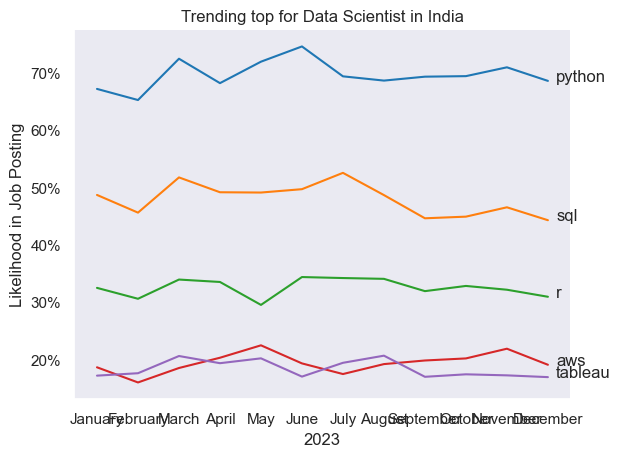

In [108]:
df_plot = df_da_per.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')

sns.set_theme(style='dark')
sns.despine()
plt.legend().set_visible(False)
plt.title('Trending top for Data Scientist in India')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2,df_plot.iloc[-1, i], df_plot.columns[i])